In [1]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

In [2]:
import cv2
import os, sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Read and show image

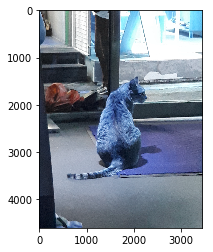

In [3]:
# cv2.imread to read image. 
img = cv2.imread('./data/cat.jpg')
plt.imshow(img)

### Accessing and Modifying pixel values

In [4]:
# Check specific pixel
print(img[100,100,0], img.item(101,101,0))

69 68


In [5]:
# Set a new value to it 
img[100,100,0] =  255
# Set a new value to it 
img.itemset((101,101,0),100)

In [6]:
# Check new value of it 
print(img[100,100,0], img.item(101,101,0))

255 100


In [7]:
# Check image shape
# set h,w as height and weight of image.
h,w = img.shape[:2]
print(img.shape)

(4608, 3456, 3)


In [8]:
# Check image size
print(img.size) # 4608*3456

47775744


In [9]:
# Check image datatype
print(img.dtype)

uint8


### Image ROI(region of images)

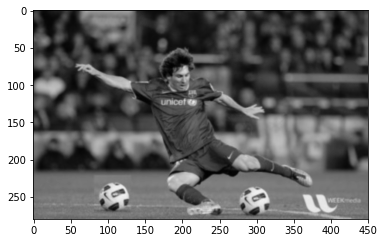

In [10]:
img2 = cv2.imread('./data/roi.jpg' ,0)
plt.imshow(img2,cmap='gray', interpolation = 'bicubic')

In [11]:
# Check img2 height and width
img2.shape

(280, 450)

In [12]:
# Specify the place of the right ball 
ball = img2[240:280, 270:320]  # img2[height1:height2, width1:width2]

# Check ball's h,w
print(ball.shape)

# Set it to new place 
img2[0:40, 100:150] = ball

(40, 50)


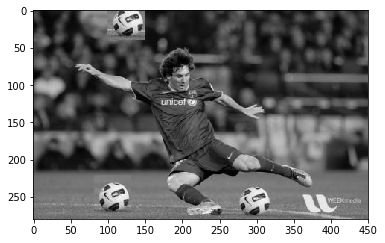

In [13]:
plt.imshow(img2, cmap='gray')

### Splitting and Merging Image Channels

In [14]:
# https://matplotlib.org/users/image_tutorial.html
# Split img into b,g,r channels
b,g,r = cv2.split(img) 

# Could do in this way
# b = img[:,:,0]
# g = img[:,:,1]
# r = img[:,:,2]

# Make all r to be 0
# img[:,:,2] = 0

print(img.shape)
print(b.shape, g.shape, r.shape)

(4608, 3456, 3)
(4608, 3456) (4608, 3456) (4608, 3456)


In [15]:
# Merge channels together
imgk = cv2.merge((b,g,r))
print(imgk.shape)

(4608, 3456, 3)


### Making Borders for Images (Padding)

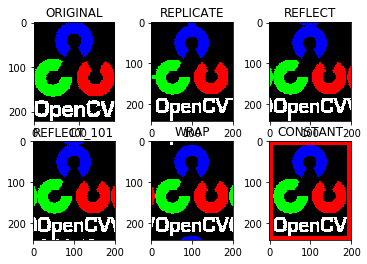

In [16]:
BLUE = [255,0,0]

# Read 
img1 = cv2.imread('./data/opencv_logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

### Arithmetic Operations on Images

In [17]:
x = np.uint8([250])
y = np.uint8([10])
print(x.shape, y.shape)
print(cv2.add(x,y)) # 250+10 = 260 => 255

(1,) (1,)
[[255]]


### Image Blending

In [18]:
img1 = cv2.imread('./data/cat.jpg')
img2 = cv2.imread('./data/opencv_logo.png')

In [19]:
# Resize the image to the same
print(img1.shape, img2.shape)
img1 = cv2.resize(img1, (180,222)) 
print(img1.shape, img2.shape)

(4608, 3456, 3) (222, 180, 3)
(222, 180, 3) (222, 180, 3)


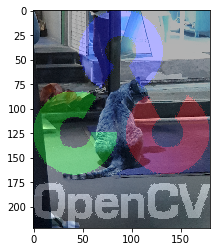

In [20]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Bitwise Operations

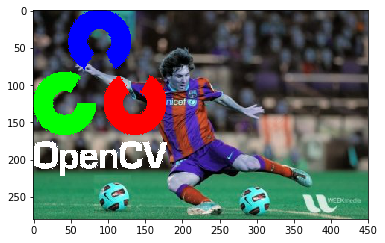

In [21]:
# Load two images
img1 = cv2.imread('./data/roi.jpg')
img2 = cv2.imread('./data/opencv_logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)
# cv2.imshow('res',img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()